In [1]:
import scanpy as sc
import pandas as pd

In [2]:
filename = '../data/Perturb-seq/data/HuTcellsCRISPRaPerturbSeq_Re-stimulated.h5ad'
adata_stim = sc.read(filename)

filename = '../data/Perturb-seq/data/HuTcellsCRISPRaPerturbSeq_Resting.h5ad'
adata_nostim = sc.read(filename)




/home/julian/miniconda3/envs/cellrep/lib/python3.12/site-packages/anndata/compat/__init__.py:329: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/julian/miniconda3/envs/cellrep/lib/python3.12/site-packages/anndata/compat/__init__.py:329: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [3]:
adata = sc.concat([adata_stim,adata_nostim ])

In [11]:
adata.obs[['condition', 'seurat_clusters', 'cluster_name']]

,condition,seurat_clusters,cluster_name
AACAACCGTCTGCATA-5,Re-stimulated,1,2: Negative Regulators
GACTCTCTCCAAATGC-5,Re-stimulated,9,10: CD8 Common
GTCATCCTCTTGAGCA-5,Re-stimulated,1,2: Negative Regulators
GTTGTAGGTTGGATCT-5,Re-stimulated,13,14: CD4 Common
TGGAGGATCAAATGAG-5,Re-stimulated,5,6: Proliferative (G2/M)
...,...,...,...
AATGGAATCAAGCCTA-4,Resting,11,12: CD4 Effector Memory?
AACAAAGAGTGCAGGT-4,Resting,7,8: CD8 Common
TCTAACTCACGTCTCT-4,Resting,0,1: Mitochondrial High
ATATCCTCATCAGTCA-4,Resting,3,4: TCR High


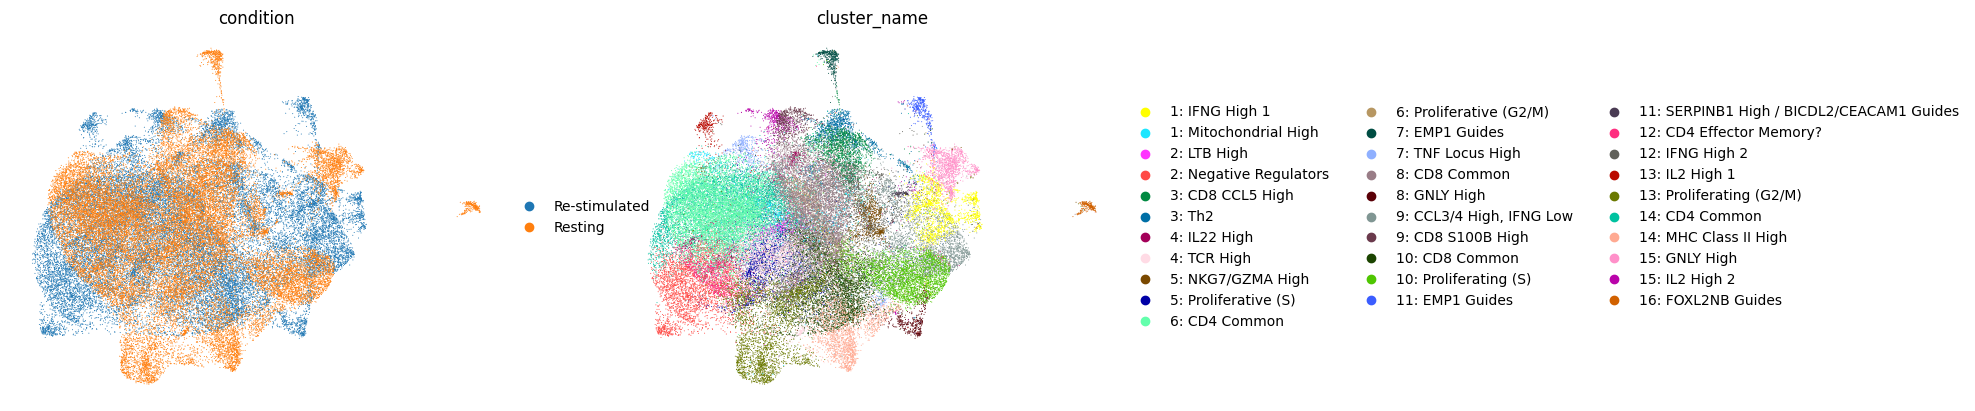

In [12]:
sc.pl.umap(adata, color = ['condition', 'cluster_name'], frameon = False)

In [22]:
import numpy as np
adata.obs['TNF'] = np.array(adata[:, adata.var.index == 'TNF'].X)

In [28]:
adata.obs

,nCount_RNA,nFeature_RNA,orig.ident,condition,guide_id,gene,gene_category,crispr,donor,percent.mt,...,nFeature_SCT,S.Score,G2M.Score,Phase,old.ident,CD4.CD8.Score,CD4.or.CD8,seurat_clusters,cluster_name,TNF
AACAACCGTCTGCATA-5,9224.0,3199,0,Re-stimulated,0,0,0,0,Donor2,5.951865,...,3137,0.285249,-0.091633,S,0,2.321928,CD4,1,2: Negative Regulators,-0.930716
GACTCTCTCCAAATGC-5,4823.0,2355,0,Re-stimulated,0,0,0,0,Donor2,10.491395,...,2355,0.035622,-0.028818,S,0,-2.496681,CD8,9,10: CD8 Common,-0.505263
GTCATCCTCTTGAGCA-5,2658.0,1540,0,Re-stimulated,0,0,0,0,Donor2,11.211437,...,1673,-0.169555,-0.157436,G1,0,-2.060021,CD8,1,2: Negative Regulators,-0.312542
GTTGTAGGTTGGATCT-5,4112.0,2050,0,Re-stimulated,0,0,0,0,Donor1,11.892023,...,2055,-0.216831,-0.140252,G1,0,2.321928,CD4,13,14: CD4 Common,2.153747
TGGAGGATCAAATGAG-5,6537.0,2794,0,Re-stimulated,0,0,0,0,Donor2,5.705981,...,2794,-0.326914,1.084080,G2M,0,-1.584963,CD8,5,6: Proliferative (G2/M),1.784613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AATGGAATCAAGCCTA-4,11216.0,3428,0,Resting,151,73,3,0,Donor1,12.820970,...,3032,-0.255092,-0.219153,G1,0,3.503330,CD4,11,12: CD4 Effector Memory?,-0.527230
AACAAAGAGTGCAGGT-4,19302.0,4739,0,Resting,151,73,3,0,Donor1,9.957517,...,2665,0.331266,0.730707,G2M,0,-1.584963,CD8,7,8: CD8 Common,-0.780597
TCTAACTCACGTCTCT-4,3176.0,1649,0,Resting,151,73,3,0,Donor2,19.773300,...,1746,-0.192950,-0.151690,G1,0,-3.030323,CD8,0,1: Mitochondrial High,-0.080182
ATATCCTCATCAGTCA-4,5266.0,2266,0,Resting,151,73,3,0,Donor2,12.590201,...,2266,-0.255719,-0.162620,G1,0,2.321928,CD4,3,4: TCR High,-0.344881


In [27]:
df_TNF_stim = adata.obs[adata.obs['condition'] == 'Re-stimulated'].sort_values('TNF').dropna(subset=['guide_id']).groupby('gene').agg(
    TNF_stim_mean=('TNF', 'mean'), TNF_stim_std=('TNF', 'std'), TNF_stim_sum=('TNF', 'sum'), TNF_stim_max=('TNF', 'max'), TNF_stim_count=('TNF', 'count'),
    guide_id_stim=('guide_id', lambda x: pd.Series(list(x)).value_counts().sort_index().to_dict()),
    # well_stim=('well', lambda x: pd.Series(x).value_counts().sort_index().to_dict())
) #.sort_values('TNF_stim_mean', ascending=False)
df_TNF_stim

,TNF_stim_mean,TNF_stim_std,TNF_stim_sum,TNF_stim_max,TNF_stim_count,guide_id_stim
gene,,,,,,
0,0.277436,1.617099,59.371258,7.030895,214,"{0: 87, 1: 127}"
1,0.343958,2.112338,63.632211,15.225253,185,"{2: 135, 3: 50}"
2,0.806692,3.695070,221.033587,30.965423,274,"{4: 194, 5: 80}"
3,0.540076,2.244788,162.562759,16.054057,301,"{6: 217, 7: 84}"
4,0.250260,1.534849,73.076054,8.609457,292,"{8: 128, 9: 164}"
...,...,...,...,...,...,...
69,0.529578,2.733782,201.769181,31.526516,381,"{142: 195, 143: 186}"
70,0.774033,2.987691,573.558513,33.096929,741,"{144: 483, 145: 258}"
71,0.415171,2.047180,210.076690,14.226321,506,"{146: 271, 147: 235}"


In [17]:
df_TNF_stim = adata.obs[adata.obs['condition'] == 'Stim'].sort_values('TNF').dropna(subset=['guide_id'])